In [312]:
import numpy as np

In [313]:
text = """The future king is the prince
Daughter is the princess 
Son is the prince
Only a man can be a king 
Only a woman can be a queen
The princess will be a queen
Queen and king rule the realm
The prince is a strong man
The princess is a beautiful woman 
The royal family is the king and queen and their children
Prince is only a boy now
A boy will be a man
"""

In [314]:
import nltk

In [315]:
stopwords = nltk.corpus.stopwords.words('english')

In [316]:
def preprocessing(string: str) -> str:
    string = string.lower()
    for rep in '\n,:.@\/()*':
        string = string.replace(rep, ' ')
    return string

In [317]:
text = preprocessing(text)

In [318]:
text = [word for word in text.split() if word not in stopwords]

In [338]:
window = 3

In [339]:
input_output = []
for i, word in enumerate(text):
    for w in range(1, window + 1):
        if i - w >= 0:
            input_output.append((word, text[i-w]))
        if i + w < len(text):
            input_output.append((word, text[i+w]))

In [340]:
input_output

[('future', 'king'),
 ('future', 'prince'),
 ('future', 'daughter'),
 ('king', 'future'),
 ('king', 'prince'),
 ('king', 'daughter'),
 ('king', 'princess'),
 ('prince', 'king'),
 ('prince', 'daughter'),
 ('prince', 'future'),
 ('prince', 'princess'),
 ('prince', 'son'),
 ('daughter', 'prince'),
 ('daughter', 'princess'),
 ('daughter', 'king'),
 ('daughter', 'son'),
 ('daughter', 'future'),
 ('daughter', 'prince'),
 ('princess', 'daughter'),
 ('princess', 'son'),
 ('princess', 'prince'),
 ('princess', 'prince'),
 ('princess', 'king'),
 ('princess', 'man'),
 ('son', 'princess'),
 ('son', 'prince'),
 ('son', 'daughter'),
 ('son', 'man'),
 ('son', 'prince'),
 ('son', 'king'),
 ('prince', 'son'),
 ('prince', 'man'),
 ('prince', 'princess'),
 ('prince', 'king'),
 ('prince', 'daughter'),
 ('prince', 'woman'),
 ('man', 'prince'),
 ('man', 'king'),
 ('man', 'son'),
 ('man', 'woman'),
 ('man', 'princess'),
 ('man', 'queen'),
 ('king', 'man'),
 ('king', 'woman'),
 ('king', 'prince'),
 ('king', 'q

In [341]:
word_to_idx = {}
idx_to_word = {}

for i, word in enumerate(text):
    if word not in word_to_idx:
        word_to_idx.update({word: len(word_to_idx)})
        idx_to_word.update({len(idx_to_word): word})

In [342]:
word_to_idx


{'future': 0,
 'king': 1,
 'prince': 2,
 'daughter': 3,
 'princess': 4,
 'son': 5,
 'man': 6,
 'woman': 7,
 'queen': 8,
 'rule': 9,
 'realm': 10,
 'strong': 11,
 'beautiful': 12,
 'royal': 13,
 'family': 14,
 'children': 15,
 'boy': 16}

In [343]:
import tensorflow as tf

In [344]:
word_to_tensors = {}

for i, word in enumerate(word_to_idx.keys()):
    sparse_tensor = tf.sparse.SparseTensor(indices=[[i]], values=[1], dense_shape=(len(word_to_idx),))
    word_to_tensors[word] = sparse_tensor

In [345]:
X_indices=[]
Y_indices=[]
X_values=[]
Y_values=[]
dense_shape=(len(word_to_idx), len(word_to_idx))
for i, item in enumerate(input_output):
    X_indices.append([i, word_to_idx[item[0]]])
    Y_indices.append([i, word_to_idx[item[1]]])
    print(word_to_idx[item[0]])
    X_values.append(1)
    Y_values.append(1)

0
0
0
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
2
2
2
2
2
2
6
6
6
6
6
6
1
1
1
1
1
1
7
7
7
7
7
7
8
8
8
8
8
8
4
4
4
4
4
4
8
8
8
8
8
8
8
8
8
8
8
8
1
1
1
1
1
1
9
9
9
9
9
9
10
10
10
10
10
10
2
2
2
2
2
2
11
11
11
11
11
11
6
6
6
6
6
6
4
4
4
4
4
4
12
12
12
12
12
12
7
7
7
7
7
7
13
13
13
13
13
13
14
14
14
14
14
14
1
1
1
1
1
1
8
8
8
8
8
8
15
15
15
15
15
15
2
2
2
2
2
2
16
16
16
16
16
16
16
16
16
6
6
6


In [346]:
X = tf.sparse.SparseTensor(indices=X_indices, values=X_values, dense_shape=(len(input_output), len(word_to_idx)))

In [347]:
Y = tf.sparse.SparseTensor(indices=Y_indices, values=Y_values, dense_shape=(len(input_output), len(word_to_idx)))

In [348]:
tf.sparse.to_dense(Y)

<tf.Tensor: shape=(180, 17), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])>

In [349]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=len(word_to_idx) ),
    tf.keras.layers.Dense(len(word_to_idx), activation='softmax')
])

In [350]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 2)                 36        
_________________________________________________________________
dense_37 (Dense)             (None, 17)                51        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [351]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=.005))

In [352]:
model.fit(tf.sparse.to_dense(X), tf.sparse.to_dense(Y), batch_size=16, epochs=1000, shuffle=True)

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.8354
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.8077
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.7830
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.7621
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.7413
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.7242
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.7073
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6920
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6797
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.6684
Epoch 11/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6581
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6481
Epoch 13/1000
12/12 [====

12/12 [==============================] - 0s 1ms/step - loss: 2.5188
Epoch 102/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5178
Epoch 103/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5167
Epoch 104/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5151
Epoch 105/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5144
Epoch 106/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5137
Epoch 107/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5134
Epoch 108/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5122
Epoch 109/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5110
Epoch 110/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5104
Epoch 111/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5105
Epoch 112/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5090
Epoch 113/1000
12/1

12/12 [==============================] - 0s 1ms/step - loss: 2.4684
Epoch 200/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4662
Epoch 201/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4655
Epoch 202/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4656
Epoch 203/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4647
Epoch 204/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4640
Epoch 205/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4647
Epoch 206/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4643
Epoch 207/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4638
Epoch 208/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4631
Epoch 209/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4634
Epoch 210/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4626
Epoch 211/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.4541
Epoch 298/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4536
Epoch 299/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4537
Epoch 300/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4541
Epoch 301/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4535
Epoch 302/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4533
Epoch 303/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4535
Epoch 304/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.4534
Epoch 305/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.4535
Epoch 306/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4531
Epoch 307/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4535
Epoch 308/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4542
Epoch 309/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.4490
Epoch 396/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4491
Epoch 397/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4479
Epoch 398/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4486
Epoch 399/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4491
Epoch 400/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4484
Epoch 401/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4468
Epoch 402/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4480
Epoch 403/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4474
Epoch 404/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4481
Epoch 405/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4478
Epoch 406/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4485
Epoch 407/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.4431
Epoch 494/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4429
Epoch 495/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4420
Epoch 496/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4422
Epoch 497/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4418
Epoch 498/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4416
Epoch 499/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4416
Epoch 500/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4420
Epoch 501/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4412
Epoch 502/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4414
Epoch 503/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4422
Epoch 504/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4410
Epoch 505/1000
12/1

12/12 [==============================] - 0s 1ms/step - loss: 2.4369
Epoch 592/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4367
Epoch 593/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4373
Epoch 594/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4382
Epoch 595/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4371
Epoch 596/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4378
Epoch 597/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4362
Epoch 598/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4362
Epoch 599/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4361
Epoch 600/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4352
Epoch 601/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4371
Epoch 602/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4359
Epoch 603/1000
12/1

12/12 [==============================] - 0s 1ms/step - loss: 2.4331
Epoch 690/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4331
Epoch 691/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4335
Epoch 692/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4330
Epoch 693/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4331
Epoch 694/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4334
Epoch 695/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4324
Epoch 696/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4319
Epoch 697/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4321
Epoch 698/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4336
Epoch 699/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4334
Epoch 700/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4327
Epoch 701/1000
12/1

12/12 [==============================] - 0s 1ms/step - loss: 2.4302
Epoch 788/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4322
Epoch 789/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4312
Epoch 790/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4314
Epoch 791/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4301
Epoch 792/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4312
Epoch 793/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4294
Epoch 794/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4303
Epoch 795/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4301
Epoch 796/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4316
Epoch 797/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4314
Epoch 798/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4312
Epoch 799/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.4285
Epoch 886/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4296
Epoch 887/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4299
Epoch 888/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4296
Epoch 889/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4296
Epoch 890/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4296
Epoch 891/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4285
Epoch 892/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4297
Epoch 893/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4297
Epoch 894/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4314
Epoch 895/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4276
Epoch 896/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4291
Epoch 897/1000
12/1

12/12 [==============================] - 0s 1ms/step - loss: 2.4274
Epoch 984/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4278
Epoch 985/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4278
Epoch 986/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4279
Epoch 987/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4292
Epoch 988/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4281
Epoch 989/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4285
Epoch 990/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4269
Epoch 991/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4267
Epoch 992/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4271
Epoch 993/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4272
Epoch 994/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.4286
Epoch 995/1000
12/1

In [353]:
weights = model.get_weights()[0]

In [354]:
word_embedding = {}
for word in word_to_idx.keys():
    word_embedding[word] = weights[word_to_idx[word]]

In [355]:
word_embedding

{'future': array([ 0.43678185, -2.7273958 ], dtype=float32),
 'king': array([0.6279843 , 0.05818233], dtype=float32),
 'prince': array([0.83534837, 0.3962841 ], dtype=float32),
 'daughter': array([0.96976095, 0.04461839], dtype=float32),
 'princess': array([-0.13213871, -3.1463723 ], dtype=float32),
 'son': array([ 0.5924412, -0.8911104], dtype=float32),
 'man': array([0.48408738, 0.5619733 ], dtype=float32),
 'woman': array([-1.9459157,  0.1524144], dtype=float32),
 'queen': array([-1.0388769,  0.7834221], dtype=float32),
 'rule': array([-0.03966068,  0.1326587 ], dtype=float32),
 'realm': array([-0.03001984,  0.14490543], dtype=float32),
 'strong': array([-0.04611586,  0.49606177], dtype=float32),
 'beautiful': array([-2.7131877,  0.5493687], dtype=float32),
 'royal': array([-3.4331875 ,  0.13163194], dtype=float32),
 'family': array([-1.9891689, -7.3455067], dtype=float32),
 'children': array([-1.4275547,  1.3962618], dtype=float32),
 'boy': array([0.45113474, 0.67876405], dtype=flo

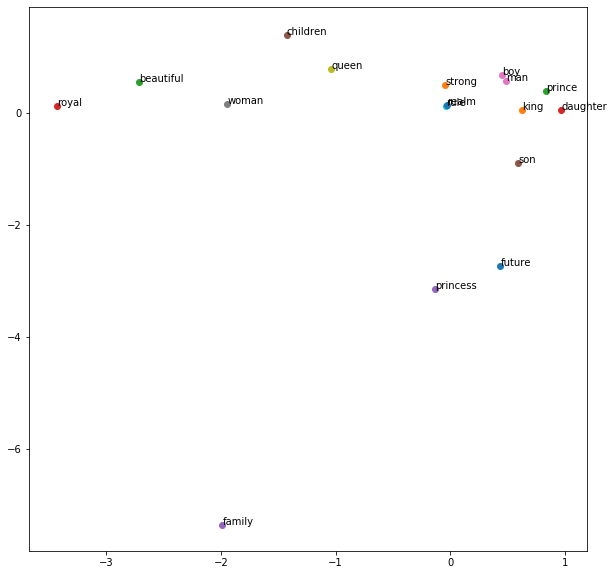

In [356]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(word_embedding.keys()):
    coord = word_embedding.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
plt.show()